In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('predicted_labels (1).csv')
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,0,15.2,29.9,33.4,89.3,0
1,0,11.9,31.0,32.5,95.4,1
2,0,17.2,31.1,34.3,90.5,0
3,0,12.9,28.0,34.0,82.1,0
4,1,14.5,30.6,33.0,92.8,0


In [3]:
df.shape

(8544, 6)

# Data Cleaning 


In [4]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000,8544.000000
mean,0.508895,13.683169,29.438635,33.809890,87.017170,0.339888
std,0.499950,1.487922,2.556528,1.035187,6.466476,0.473699
min,0.000000,6.400000,16.800000,28.000000,55.700000,0.000000
25%,0.000000,12.700000,28.100000,33.300000,83.200000,0.000000
50%,1.000000,13.600000,29.700000,33.800000,87.500000,0.000000
75%,1.000000,14.700000,31.100000,34.400000,91.300000,1.000000
max,1.000000,19.500000,74.500000,69.600000,115.300000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8544 entries, 0 to 8543
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      8544 non-null   int64  
 1   Hemoglobin  8544 non-null   float64
 2   MCH         8544 non-null   float64
 3   MCHC        8544 non-null   float64
 4   MCV         8544 non-null   float64
 5   Result      8544 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 400.6 KB


In [6]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [7]:
(df==" ").sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [8]:
df.duplicated().sum()

45

### Remove Duplicates 

In [9]:
df_cleaned= df.copy()
df_cleaned= df_cleaned.drop_duplicates()
df_cleaned

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,0,15.2,29.9,33.4,89.3,0
1,0,11.9,31.0,32.5,95.4,1
2,0,17.2,31.1,34.3,90.5,0
3,0,12.9,28.0,34.0,82.1,0
4,1,14.5,30.6,33.0,92.8,0
...,...,...,...,...,...,...
8539,0,12.7,27.8,33.3,83.6,0
8540,0,14.9,29.3,32.9,88.9,0
8541,1,12.2,28.9,35.0,82.7,1
8542,1,12.2,29.2,32.8,89.1,1


In [10]:
colors = ["#e60026", "#001f3f", "#007f7f"]

# Data Visualization & EDA

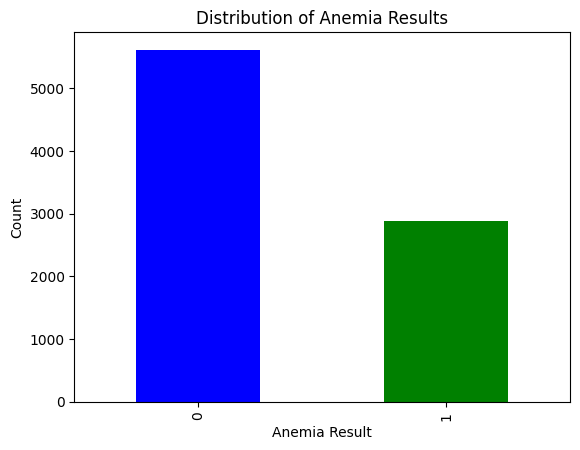

In [11]:
results= df_cleaned['Result'].value_counts()
results.plot(kind='bar', color=['blue','green'])
plt.title('Distribution of Anemia Results')
plt.xlabel('Anemia Result')
plt.ylabel('Count')
plt.show()

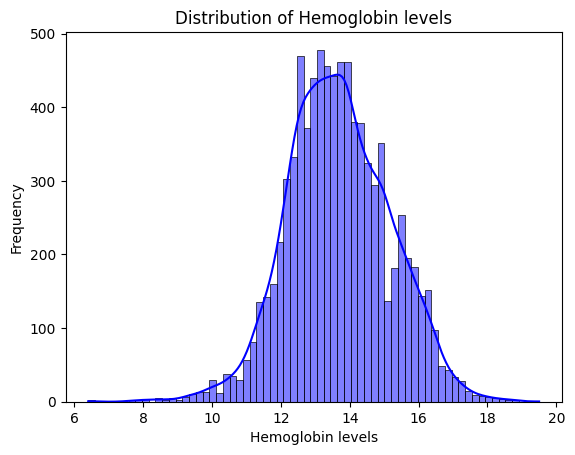

In [12]:
sns.histplot(df_cleaned['Hemoglobin'], kde=True, color= 'blue')
plt.title('Distribution of Hemoglobin levels')
plt.xlabel('Hemoglobin levels')
plt.ylabel('Frequency')
plt.show()

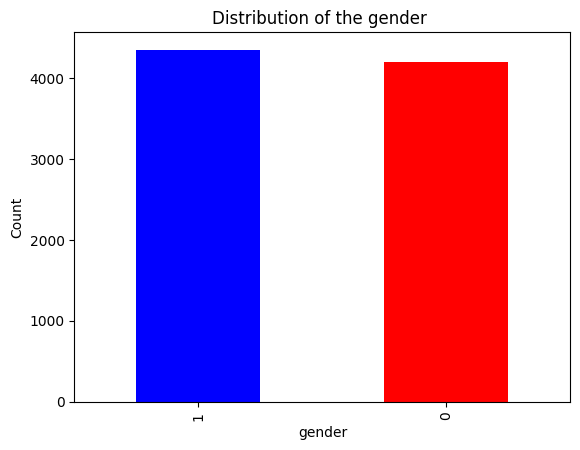

In [13]:
output= df['Gender'].value_counts()
output.plot(kind='bar',color=['blue','red'])
plt.title('Distribution of the gender ')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

C:\Users\altam\AppData\Local\Temp\ipykernel_7888\2830595231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Hemoglobin'],kde=True )


<Axes: xlabel='Hemoglobin', ylabel='Density'>

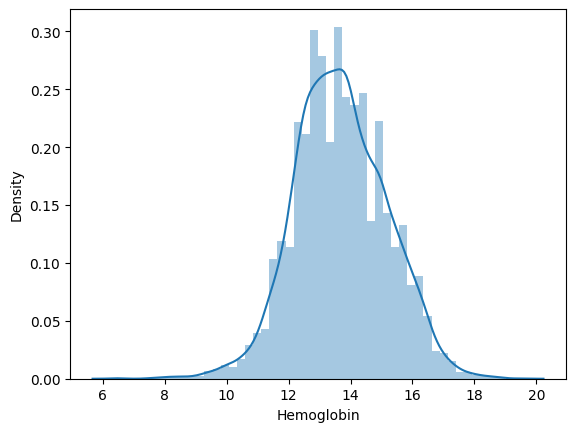

In [14]:
sns.distplot(df_cleaned['Hemoglobin'],kde=True )

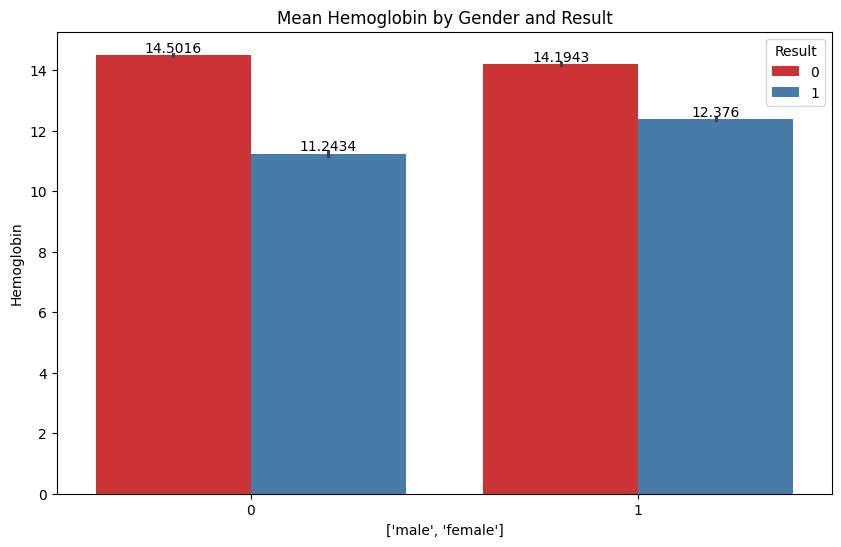

In [15]:
plt.figure(figsize=(10,6))
ax= sns.barplot(y=df_cleaned['Hemoglobin'], x=df_cleaned['Gender'], hue= df_cleaned['Result'], palette='Set1')
ax.set(xlabel=['male','female'])
ax.bar_label(container=ax.containers[0])
ax.bar_label(container= ax.containers[1])
plt.title('Mean Hemoglobin by Gender and Result')
plt.show()

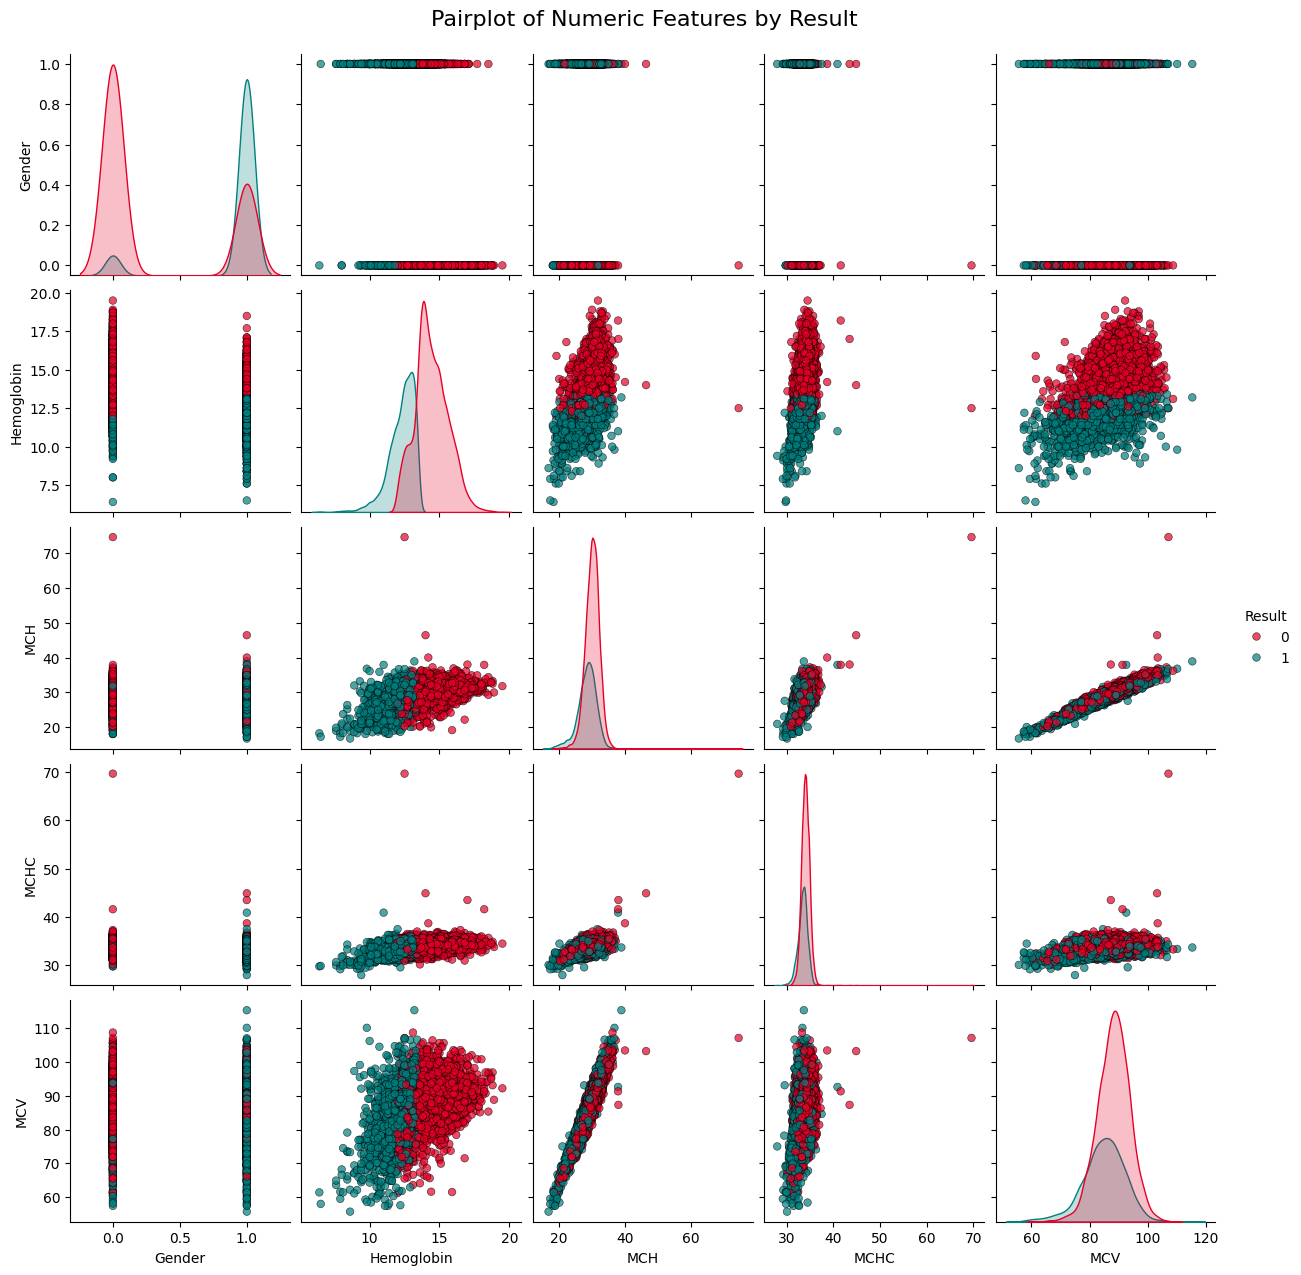

In [16]:
sns.pairplot(
   df_cleaned,
   hue='Result',
   palette=[colors[0],colors[2]],
   diag_kind='kde',
   height=2.5,
   plot_kws={'alpha': 0.7, 's': 30, 'edgecolor': 'k'},
)
plt.suptitle('Pairplot of Numeric Features by Result', y=1.02, fontsize=16)
plt.show()


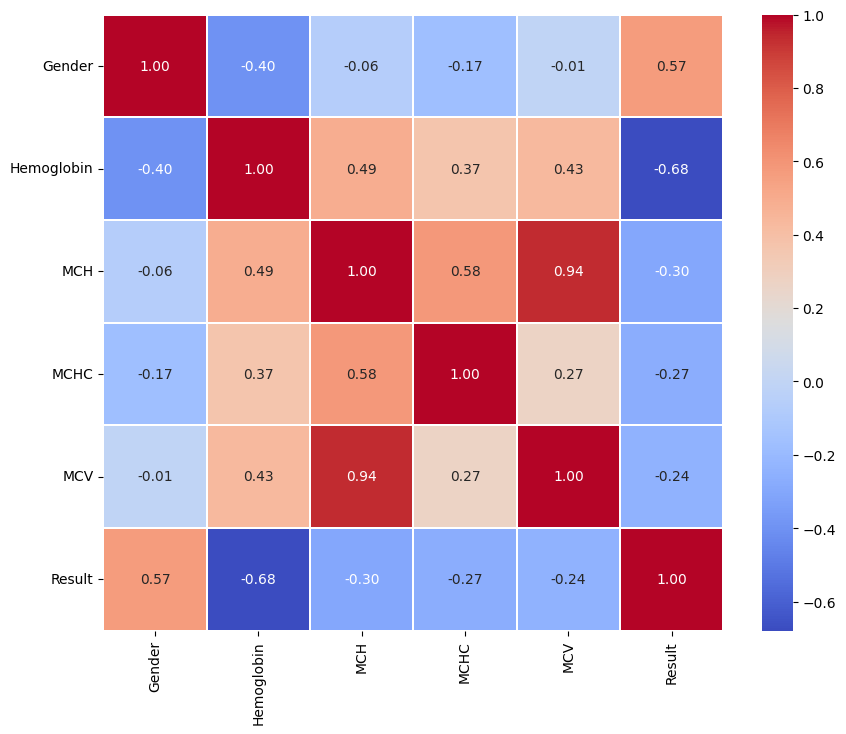

In [17]:
sns.heatmap(df_cleaned.corr(),annot=True, cmap='coolwarm',fmt='.2f',linewidths= 0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [18]:
print(df_cleaned.dtypes)
print(df_cleaned.nunique())


Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object
Gender          2
Hemoglobin    108
MCH           191
MCHC           84
MCV           431
Result          2
dtype: int64


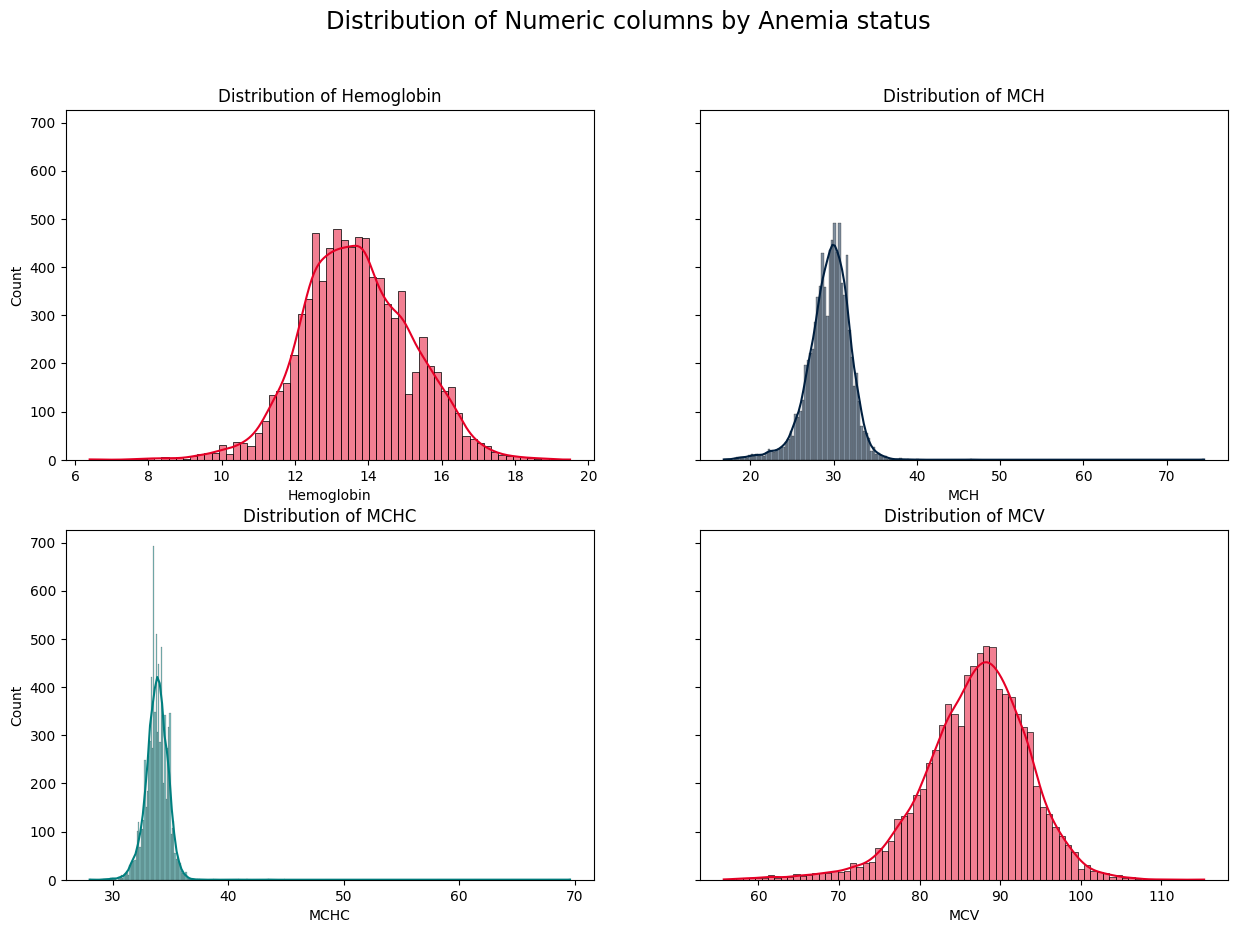

In [19]:
numeric_cols= [col for col in df_cleaned.columns if df_cleaned[col].dtype==float]
fig, axs = plt.subplots(2,2 ,figsize=(15,10), sharey=True)

for i, col in enumerate(numeric_cols):
    ax = axs[i // 2][i % 2]
    sns.histplot(df_cleaned[col], ax=ax, kde=True ,color=colors[i % len(colors)])
    ax.set_title(f'Distribution of {col}')

fig.suptitle('Distribution of Numeric columns by Anemia status', fontsize="xx-large")
plt.show()   



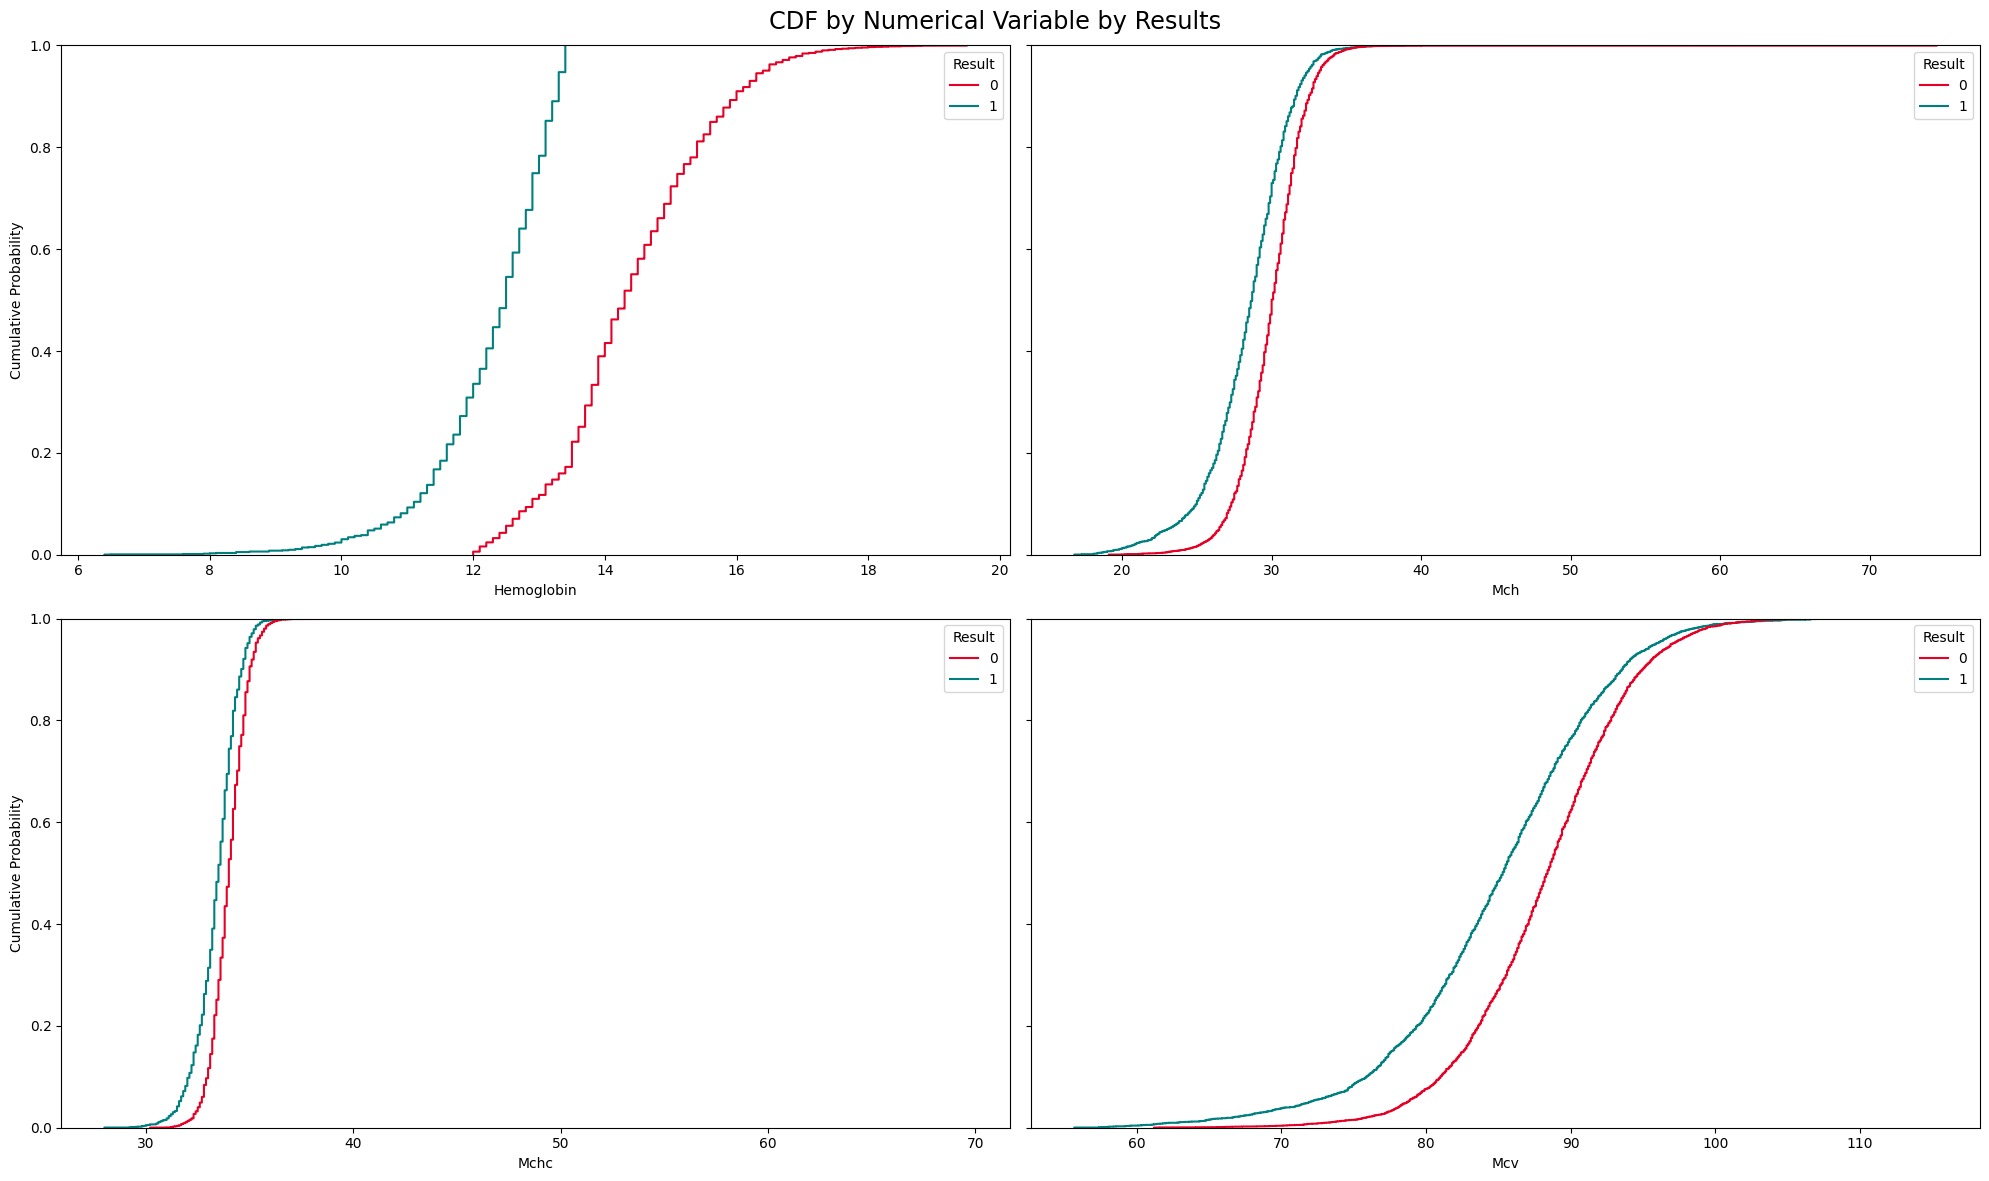

In [20]:
numeric_cols= df_cleaned.select_dtypes(include=float).columns.tolist()

fig, axs = plt.subplots(2, 2, figsize=(20, 12), sharey=True)
for i, col in enumerate(numeric_cols):
    ax = axs[i // 2][i % 2]
    sns.ecdfplot(data=df_cleaned, x=col, hue='Result', ax=ax, palette= [colors[0],colors[2]])
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Cumulative Probability")

fig.suptitle('CDF by Numerical Variable by Results', fontsize= "xx-large")

fig.tight_layout()
plt.show()


# Models and Predictions

In [21]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [22]:
x= df_cleaned.drop(['Result'],axis=1)
y= df_cleaned['Result']

x_train, x_test,y_train, y_test = train_test_split(x,y ,test_size=0.2, stratify= y, random_state= 42)

print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 4489, 1: 2310})
After SMOTE: Counter({0: 4489, 1: 4489})


In [23]:

from sklearn.ensemble import GradientBoostingClassifier
models= {
   "Logistic Regression": LogisticRegression(max_iter=1000),
   "Random Forest": RandomForestClassifier(n_estimators= 1000),
   "Decision Tree": DecisionTreeClassifier(),
   "GBC": GradientBoostingClassifier(),
   "SVM": SVC(probability= True),
   "Naive Bayes": GaussianNB(),
   "KNN": KNeighborsClassifier()
}

from sklearn.metrics import roc_auc_score

results=[]

for name,model in models.items():
   model.fit(x_train_resampled, y_train_resampled)
   y_pred= model.predict(x_test)
   y_prob= model.predict_proba(x_test)[:,1] if hasattr(model, "predict_proba") else None
   acc= accuracy_score(y_test, y_pred)
   auc= roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"

   print(f"Accuracy : {acc:.4f}")
   print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
   print(f"Classification Report :\n{classification_report(y_test, y_pred)}") 
   print(f"ROC-AUC Score: {auc}")

   results.append((name, round(acc,4), round(auc,4)))

summary_report= pd.DataFrame(results, columns=["Model", "Accuracy","ROC-AUC"])

summary_report = summary_report.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

def highlight_best(val, col):
    return 'background-color: lightgreen' if val == summary_report[col].max() else ''

styled_report = summary_report.style\
    .applymap(lambda v: 'color: green' if v == summary_report["Accuracy"].max() else '', subset=["Accuracy"])\
    .applymap(lambda v: 'color: yellow' if v == summary_report["ROC-AUC"].max() else '', subset=["ROC-AUC"])\
    .applymap(lambda v: 'font-weight: bold;', subset=["Model"])

display(styled_report)
 

Accuracy : 0.9918
Confusion Matrix: 
[[1110   13]
 [   1  576]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1123
           1       0.98      1.00      0.99       577

    accuracy                           0.99      1700
   macro avg       0.99      0.99      0.99      1700
weighted avg       0.99      0.99      0.99      1700

ROC-AUC Score: 0.9999182062160189
Accuracy : 1.0000
Confusion Matrix: 
[[1123    0]
 [   0  577]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1123
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

ROC-AUC Score: 1.0
Accuracy : 1.0000
Confusion Matrix: 
[[1123    0]
 [   0  577]]
Classification Report :
              precision    re

C:\Users\altam\AppData\Local\Temp\ipykernel_7888\1485308149.py:37: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_report = summary_report.style\


,Model,Accuracy,ROC-AUC
0,Random Forest,1.000000,1.000000
1,Decision Tree,1.000000,1.000000
2,GBC,1.000000,1.000000
3,Logistic Regression,0.991800,0.999900
4,KNN,0.967600,0.992300
5,Naive Bayes,0.921800,0.975000
6,SVM,0.882900,0.980600


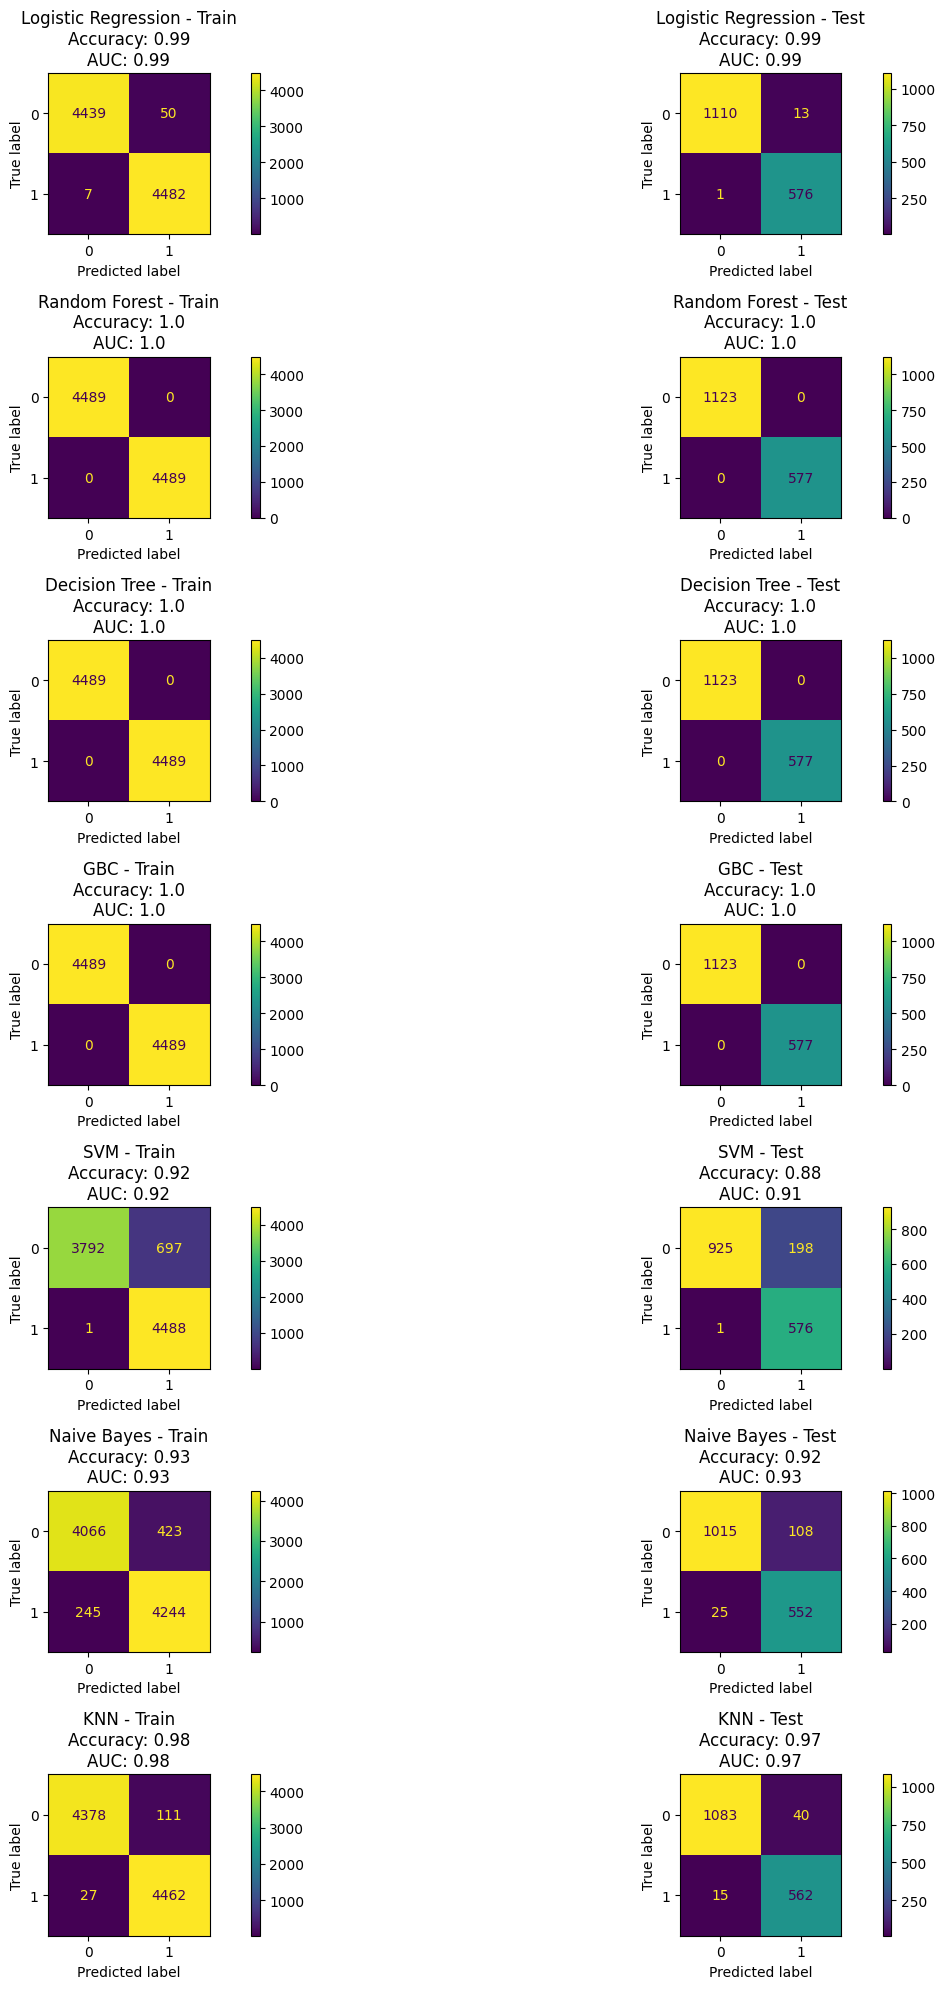

In [24]:

from sklearn.metrics import ConfusionMatrixDisplay
fig , axes= plt.subplots(nrows= len(models), ncols= 2, figsize=(15,20))
for i,name in enumerate(models.keys()):
   model=models[name]
   model.fit(x_train_resampled, y_train_resampled)
   y_pred_train= model.predict(x_train_resampled)
   y_pred_test= model.predict(x_test)

   accuracy_train= accuracy_score(y_train_resampled, y_pred_train)
   accuracy_test= accuracy_score(y_test, y_pred_test)

   auc_train= roc_auc_score(y_train_resampled, y_pred_train)
   auc_test= roc_auc_score(y_test, y_pred_test)

   cm_train= confusion_matrix(y_train_resampled, y_pred_train)
   cm_test= confusion_matrix(y_test, y_pred_test)

   ConfusionMatrixDisplay(cm_train).plot(ax=axes[i, 0], values_format='d')
   ConfusionMatrixDisplay(cm_test).plot(ax=axes[i, 1], values_format='d')
    
   axes[i, 0].set_title(f"{name} - Train\nAccuracy: {round(accuracy_train,2)}\nAUC: {round(auc_train,2)}")
   axes[i, 1].set_title(f"{name} - Test\nAccuracy: {round(accuracy_test,2)}\nAUC: {round(auc_test,2)}")
    
plt.tight_layout()
plt.show()




## Model Selection

In [25]:
from sklearn.model_selection import cross_val_score

for name in models.keys():
   model= models[name]
   scores=cross_val_score(model, x,y,cv=5)
   print("--"*10, f" {name} ", "--"*10)
   print(f"\nCross-validation scores: {scores}")
   print(f"Mean score: {scores.mean()}")

--------------------  Logistic Regression  --------------------

Cross-validation scores: [0.99705882 1.         0.99705882 0.99882353 0.99941142]
Mean score: 0.9984705189904096
--------------------  Random Forest  --------------------

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean score: 1.0
--------------------  Decision Tree  --------------------

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean score: 1.0
--------------------  GBC  --------------------

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean score: 1.0
--------------------  SVM  --------------------

Cross-validation scores: [0.87823529 0.87882353 0.88529412 0.86470588 0.88051795]
Mean score: 0.8775153550531455
--------------------  Naive Bayes  --------------------

Cross-validation scores: [0.91941176 0.91588235 0.92764706 0.93176471 0.93525603]
Mean score: 0.9259923830627013
--------------------  KNN  --------------------

Cross-validation scores: [0.96764706 0.96588235 0.96941176 0.96529412 0.96409653]
Mean score: 0.9664

In [26]:
# Use the trained GBC model instance
prediction = models["GBC"].predict([[0,11.6,22.3,30.9,74.5]])
if prediction[0] == 0:
    print("You do not have Anemia disease")
elif prediction[0] == 1:
    print("You have Anemia disease")

You have Anemia disease


C:\Users\altam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [27]:
reduced_df = df_cleaned.drop(["MCV", "MCH", "MCHC"], axis=1)

X_new = reduced_df.drop("Result", axis=1)
y_new = reduced_df["Result"]

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_new, y_new, test_size=0.25, stratify=y_new, random_state=42)

red_model = RandomForestClassifier(random_state=42)

red_model.fit(X_train_red, y_train_red)

y_pred_train = red_model.predict(X_train_red)
y_pred_test = red_model.predict(X_test_red)

accuracy_train = accuracy_score(y_train_red, y_pred_train)
accuracy_test = accuracy_score(y_test_red, y_pred_test)

auc_train = roc_auc_score(y_train_red, y_pred_train)
auc_test = roc_auc_score(y_test_red, y_pred_test)

print("--"*10, f" Random Forest ", "--"*10)
print(f"\nAccuracy score: \tTrain: {round(accuracy_train,2)} \tTest: {round(accuracy_test,2)}")
print(f"\nAUC score: \t\tTrain: {round(auc_train,2)} \tTest: {round(auc_test,2)}\n")

--------------------  Random Forest  --------------------

Accuracy score: 	Train: 1.0 	Test: 1.0

AUC score: 		Train: 1.0 	Test: 1.0



## Model Testing 

In [28]:
data = {
    'Gender': ['0', '1', '0', '1', '0', '1', '0', '1', '0', '1'],
    'Hemoglobin': [12.5, 9.3, 13.3, 10.1, 13.7, 11.5, 10.9, 9.8, 12.1, 11.0],
    'Result': ['0', '1', '0', '1', '0', '1', '0', '1', '0', '1']
}

df_Test = pd.DataFrame(data)

df_Test

,Gender,Hemoglobin,Result
0,0,12.5,0
1,1,9.3,1
2,0,13.3,0
3,1,10.1,1
4,0,13.7,0
5,1,11.5,1
6,0,10.9,0
7,1,9.8,1
8,0,12.1,0
9,1,11.0,1


In [29]:
reduced_df= df_cleaned.drop(["MCV" ,"MCH","MCHC"],axis=1)
X_Test= df_Test.drop('Result', axis=1)
y_Test= df_Test['Result']
y_pred_test= red_model.predict(X_Test)


In [30]:
df_Test['Predicted_Result'] = y_pred_test

In [31]:
df_Test.head(10)

,Gender,Hemoglobin,Result,Predicted_Result
0,0,12.5,0,0
1,1,9.3,1,1
2,0,13.3,0,0
3,1,10.1,1,1
4,0,13.7,0,0
5,1,11.5,1,1
6,0,10.9,0,1
7,1,9.8,1,1
8,0,12.1,0,0
9,1,11.0,1,1


In [32]:
X_Test

,Gender,Hemoglobin
0,0,12.5
1,1,9.3
2,0,13.3
3,1,10.1
4,0,13.7
5,1,11.5
6,0,10.9
7,1,9.8
8,0,12.1
9,1,11.0


In [33]:
import pickle
import warnings

pickle.dump(red_model, open("model.pkl","wb"))